In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from scipy import constants
# import oct2py

# rk4 only works for 1st order DE

G = constants.G
c = constants.speed_of_light

m = 1 #1.989 * 10**30              # mass of the sun in kg
M = 2 #10**6 * m                   # mass of BH

L = 100



A = 1 # G*M
B = 0.005 #L**2 / m**2
C = 0.8 #3*G*M*L**2 / (m*c**2)


r0=1
v0 = 1
t = np.linspace(0,1000,1000)

t0 = t[0]



# du/dx = f(x)
def v_(t,r,v):
    # r = np.sqrt(x**2+y**2)
    return -A/r**2 + B/(r**3)-C/(r**4)

def r_(t,r,v):
    return v

'''
Zweiter Versuch
'''


r = np.zeros(len(t))
v = np.zeros(len(t))
r[0]=r0
v[0]=v0



def my_rk4(r0,v0,h = 0.02):
    r = np.zeros(len(t))
    v = np.zeros(len(t))
    r[0]=r0
    v[0]=v0
    for i in range(0,len(t)-1):
        k1r = (r_(t[i], r[i], v[i]))
        k1v = (v_(t[i], r[i], v[i]))
        k2r = (r_(t[i]+ h/2, r[i] + h*k1r/2, v[i] + h*k1v/2))
        k2v = (v_(t[i]+ h/2, r[i] + h*k1r/2, v[i] + h*k1v/2))
        k3r = (r_(t[i]+ h/2, r[i] + h*k2r/2, v[i] + h*k2v/2))
        k3v = (v_(t[i]+ h/2, r[i] + h*k2r/2, v[i] + h*k2v/2))
        k4r = (r_(t[i]+ h, r[i] + h*k3r/2, v[i] + h*k3v/2))
        k4v = (v_(t[i]+ h, r[i] + h*k3r/2, v[i] + h*k3v/2))
        r[i+1]  = r[i] + (k1r+2*k2r+2*k3r+k4r)*h/6
        v[i+1]  = v[i] + (k1v+2*k2v+2*k3v+k4v)*h/6
        if r[i] <= 0:
            r[i] = 0
            r = r[:i]
            v = v[:i]
            break
    return v, r


def Cartesian(r,N=1):
    theta=np.linspace(0,N*2*np.pi,len(t))   #=> we also need to define the frequency, I took randomly 1*(2pi)
    x=r*np.cos(theta[0:len(my_r)]) 
    y=r*np.sin(theta[0:len(my_r)]) 
    return x,y

my_v, my_r = my_rk4(r0,v0)

print(len(my_v), len(my_r))

134 134


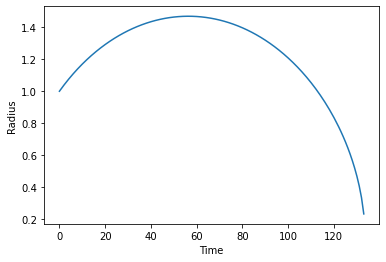

In [2]:
plt.plot(t[0:len(my_r)],my_r)
plt.xlabel("Time")
plt.ylabel("Radius")
plt.show()

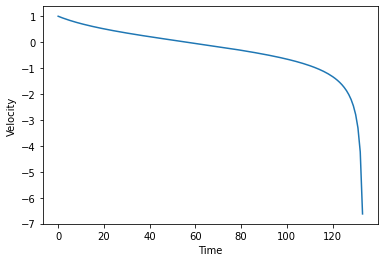

In [3]:
plt.plot(t[0:len(my_v)],my_v)
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.show()

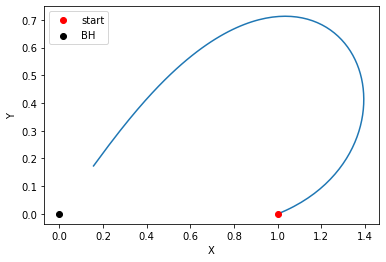

In [4]:
my_x,my_y=Cartesian(my_r)
plt.plot(my_x,my_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(0,0,color="black",marker="o",label="BH")
plt.plot(my_x[0],my_y[0],"ro",label="start")
plt.legend()
plt.show()

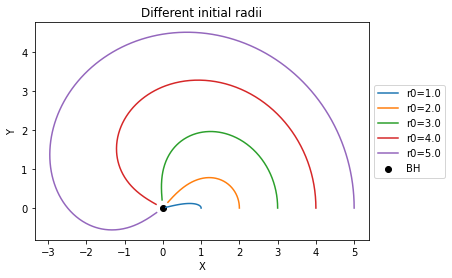

In [5]:
r0s=np.linspace(1,5,5)
for k in range(len(r0s)):
    my_v, my_r = my_rk4(r0s[k],0)
    my_x,my_y=Cartesian(my_r)
    plt.plot(my_x,my_y,label='r0={}'.format(r0s[k]))
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(0,0,color="black",marker="o",label="BH")
plt.title("Different initial radii")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

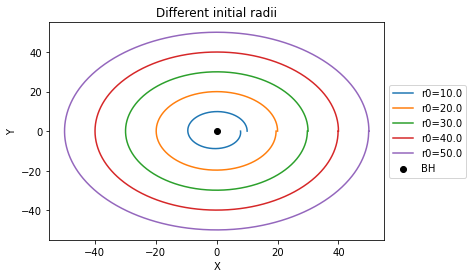

In [6]:
r0s=np.linspace(10,50,5)
for k in range(len(r0s)):
    my_v, my_r = my_rk4(r0s[k],0)
    my_x,my_y=Cartesian(my_r)
    plt.plot(my_x,my_y,label='r0={}'.format(r0s[k]))
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(0,0,color="black",marker="o",label="BH")
plt.title("Different initial radii")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

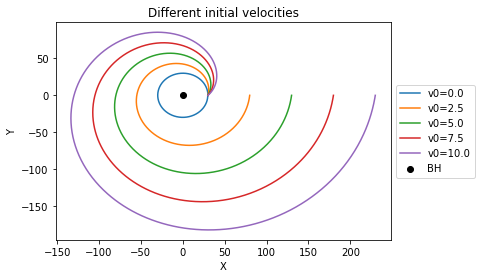

In [7]:
v0s=np.linspace(0,10,5)
for k in range(len(v0s)):
    my_v, my_r = my_rk4(30,v0s[k])
    my_x,my_y=Cartesian(my_r)
    plt.plot(my_x,my_y,label='v0={}'.format(v0s[k]))
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(0,0,color="black",marker="o",label="BH")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Different initial velocities")
plt.show()